## Y&Z세대 투자자 프로파일링 대회 시각화 부문

#### 서론
올해는 그 어느 해보다 YZ세대에서 주식에 대한 관심이 뜨거웠습니다.   
코로나 사태로 인해 하락한 주가, 0%대의 은행 금리, 복잡해진 부동산 정책으로 평소라면 은행과 부동산에 있을 자금이 주식시장에 대거 유입되었습니다.   
이런 시대에 주식에 투자하고 있는 투자자들에 대한 세대별 갖가지 분석을 진행해보도록 하겠습니다.

#### 본론
고객 등급별 투자성향 및 투자성향별 고객 등급  
투자유형별 많이 거래한 상위 5개 국내 종목명  
세대별 많이 거래한 상위 5개 국내 종목명  
세대별 평균 고객 등급  
연령별/세대별 투자 성향과 주문매체  
시도별 투자 성향과 고객등급  
세대별 거래통화코드  
세대별 매도매수 개수 비교  
코로나사태에 의한 바이오주 매매 변화량

In [123]:
submit=pd.read_csv('https://drive.google.com/uc?export=download&id=1jZmAojfZIIB1Bku0DDdH0DPVnJSXRR9n')
submission=test[['time','team','join']]
submission.to_csv('C:\Users\Administrator\Desktop',index=False)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-123-9df11d38a570>, line 3)

### 필요 라이브러리 import

In [1]:
import numpy as np
import pandas as pd
import copy
import collections
from scipy import linalg
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz
from IPython.display import display
#import pydotplus
import os
from sklearn import tree
#from graphviz import Source
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

### CSV 파일 데이터 로드

In [56]:
act_df = pd.read_csv('2_act_info.csv')
cus_df = pd.read_csv('2_cus_info.csv')
iem_df = pd.read_csv('2_iem_info.csv')
trdkr_df = pd.read_csv('2_trd_kr.csv')
trdoss_df = pd.read_csv('2_trd_oss.csv')

In [7]:
cus_df2 = cus_df

* 결측값 여부 확인

In [8]:
print(cus_df.isnull().sum())
print(act_df.isnull().sum())
print(iem_df.isnull().sum())
print(trdkr_df.isnull().sum())
print(trdoss_df.isnull().sum())

cus_id            0
sex_dit_cd        0
cus_age           0
zip_ctp_cd        0
tco_cus_grd_cd    0
ivs_icn_cd        0
dtype: int64
act_id        0
cus_id        0
act_opn_ym    0
dtype: int64
iem_cd        0
iem_eng_nm    0
iem_krl_nm    0
dtype: int64
act_id            0
orr_dt            0
orr_ord           0
orr_rtn_hur       0
lst_cns_hur       0
iem_cd            0
sby_dit_cd        0
cns_qty           0
orr_pr            0
orr_mdi_dit_cd    0
dtype: int64
act_id            0
orr_dt            0
orr_ord           0
orr_rtn_hur       0
lst_cns_hur       0
iem_cd            0
sby_dit_cd        0
cns_qty           0
orr_pr            0
orr_mdi_dit_cd    0
cur_cd            0
trd_cur_xcg_rt    0
dtype: int64


### 고객 등급별 투자성향 및 투자성향별 고객 등급

* 한글깨짐 방지-font위치 알아보기

In [9]:
from matplotlib import font_manager

for font in font_manager.fontManager.ttflist:
    if 'Mal' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\Windows\Fonts\malgun.ttf
Malgun Gothic C:\windows\Fonts\malgun.ttf
Malgun Gothic C:\Windows\Fonts\malgunsl.ttf
Malgun Gothic C:\windows\Fonts\malgunsl.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Malgun Gothic C:\windows\Fonts\malgunbd.ttf


* 고객등급 및 투자성향 데이터 수정(숫자->한글)

In [10]:
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('01', '안정형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('02', '안정추구형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('03', '위험중립형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('04', '적극투자형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('05', '공격투자형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('09', '전문투자자형')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('00', '정보제공미동의')
cus_df2.ivs_icn_cd = cus_df2.ivs_icn_cd.replace('_', '해당 사항 없음')

cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('01', '탑클래스')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('02', '골드')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('03', '로얄')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('04', '그린')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('05', '블루')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('09', '등급 없음')
cus_df2.tco_cus_grd_cd = cus_df2.tco_cus_grd_cd.replace('_', '해당 사항 없음')

* 고객등급별 투자성향 시각화

<AxesSubplot:xlabel='tco_cus_grd_cd', ylabel='count'>

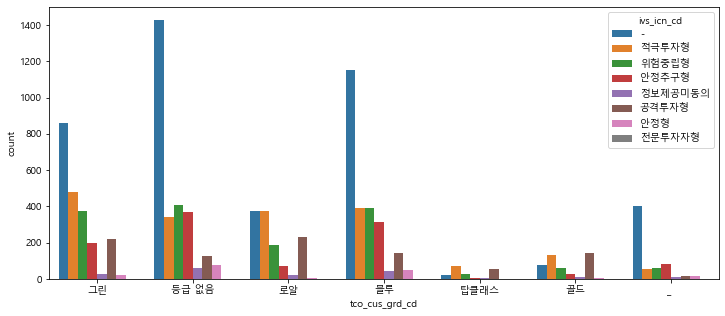

In [11]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
# 한글깨짐 방지
fm.get_fontconfig_fonts()
font_location = 'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# 그래프 출력
plt.figure(figsize=(12,5))
sns.countplot(x='tco_cus_grd_cd', hue="ivs_icn_cd",data=cus_df2)

* 투자성향별 고객등급 시각화

<AxesSubplot:xlabel='ivs_icn_cd', ylabel='count'>

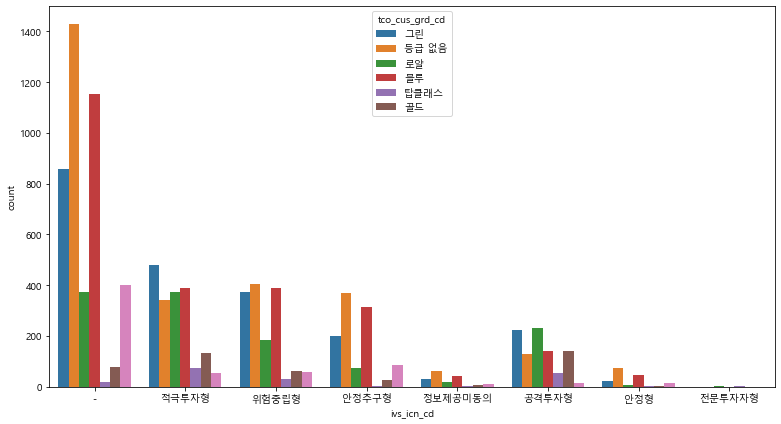

In [12]:
# 한글깨짐 방지
fm.get_fontconfig_fonts()
font_location = 'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
plt.rc('font', family=font_name)

# 그래프 출력
plt.figure(figsize=(13,7))
sns.countplot(x='ivs_icn_cd', hue="tco_cus_grd_cd",data=cus_df2)

> 시드머니가 많을 수록 많은 돈을 벌 수 있기에, 등급이 높을 수록 주식 투자를 더 많이 할 것이라는 가설과 달리 탑클래스와 골드 등급 고객의 거래량이 적은 걸 알 수 있었습니다. 위 등급을 제외하고는 등급이 높을 수록 공격투자형, 적극투자형의 비율이 많고, 낮을 수록 비교적 원금보장이 되는 안정적인 성향을 가진 것을 알 수 있었습니다.

### 투자유형별 많이 거래한 상위 5개 종목명 - 국내

* 많이 거래한 상위 5개 종목을 데이터프레임으로 리턴하는 함수

In [13]:
def type_trdkr(type):
    cus_id_df = cus_df2[cus_df2['ivs_icn_cd']==type]
    cus_act_df = pd.merge(cus_id_df, act_df, how='inner', on='cus_id')
    trdkr_type_df = pd.merge(cus_act_df, trdkr_df, how='inner', on='act_id')
    trdkr_type_iem = pd.value_counts(trdkr_type_df.iem_cd)
    type_iem_count = trdkr_type_iem[:5]
    type_iem_df = type_iem_count.rename_axis('iem_cd').reset_index(name='counts')
    type_iem_df = pd.merge(type_iem_df, iem_df, how='inner', on='iem_cd')
    return type_iem_df

#### 안정형이 많이 거래한 상위 5개 종목명 - 국내

In [14]:
stability_type = type_trdkr("안정형")
stability_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,1028,SamsungElectronics ...,삼성전자보통주 ...
1,A252670,833,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
2,A215600,669,"SillaJen, Inc. ...",신라젠 ...
3,A122630,609,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
4,A002150,563,DOHWA ENGINEERING ...,도화엔지니어링보통주 ...


#### 안정추구형이 많이 거래한 상위 5개 종목명 - 국내

In [15]:
seekStability_type = type_trdkr("안정추구형")
seekStability_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,6732,SamsungElectronics ...,삼성전자보통주 ...
1,A252670,5338,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
2,A008350,3601,NamsunAluminium ...,남선알미늄보통주 ...
3,A078130,3337,"KUK-IL PAPER MFG CO.,LTD ...",국일제지 ...
4,A096530,2482,Seegene Inc. ...,씨젠 ...


#### 위험중립형이 많이 거래한 상위 5개 종목명 - 국내

In [16]:
riskNeutral_type = type_trdkr("위험중립형")
riskNeutral_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,11432,SamsungElectronics ...,삼성전자보통주 ...
1,A122630,9277,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
2,A252670,8415,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
3,A028300,5835,HLB INC. ...,에이치엘비 ...
4,A008350,4168,NamsunAluminium ...,남선알미늄보통주 ...


#### 적극투자형이 많이 거래한 상위 5개 종목명 - 국내

In [17]:
active_type = type_trdkr("적극투자형")
active_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,13681,SamsungElectronics ...,삼성전자보통주 ...
1,A000660,7879,SK hynix ...,에스케이하이닉스보통주 ...
2,A252670,7306,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
3,A068270,7202,Celltrion ...,셀트리온보통주 ...
4,A010620,5523,HyundaiMipoDockyard ...,현대미포조선보통주 ...


#### 공격투자형이 많이 거래한 상위 5개 종목명 - 국내

In [18]:
attack_type = type_trdkr("공격투자형")
attack_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A252670,9699,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
1,A233740,8815,SAMSUNG KODEX KOSDAQ150 LEVERAGE ETF ...,삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생 ...
2,A122630,8549,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
3,A005930,4810,SamsungElectronics ...,삼성전자보통주 ...
4,A035720,3950,Kakao ...,카카오보통주 ...


#### 전문투자자형이 많이 거래한 상위 5개 종목명 - 국내

In [19]:
professional_type = type_trdkr("전문투자자형")
professional_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A131370,529,"RSUPPORT Co., Ltd. ...",알서포트 ...
1,A226330,390,"SyntekaBio,Inc. ...",신테카바이오 ...
2,A058610,352,"SPG CO., LTD ...",에스피지 ...
3,A131390,264,"PNE SOLUTION CO., LTD ...",피앤이솔루션 ...
4,A196170,230,Alteogen Inc. ...,알테오젠 ...


> 투자형태와 상관 없이 삼성전자는 모두에게 인기있는 종목이었습니다. 빚을 이용한 투자인 레버리지 종목은 역시 공격투자형에서 많이 나타났으며, 변동이 심해 고수들의 분야였던 바이오 종목은 코로나 시대 때문인지 안정 중심의 투자형태에서도 볼 수 있었습니다. 이에 대해 뒤에서 더 분석해보도록 하겠습니다.

### 세대별 많이 거래한 상위 5개 종목명 - 국내

In [20]:
# YZ 이전 세대=0, Y세대=1, Z세대=2
x_cus=cus_df2[(cus_df2['cus_age']>=45)]
Generation=0
x_cus['Generation']=Generation

y_cus=cus_df2[(cus_df2['cus_age']<45)&(cus_df2['cus_age']>=30)]
Generation=1
y_cus['Generation']=Generation

z_cus=cus_df2[(cus_df2['cus_age']<30)]
Generation=2
z_cus['Generation']=Generation

gen_df=pd.concat([x_cus,y_cus,z_cus],ignore_index=True)

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [21]:
gen_df

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,Generation
0,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,로얄,-,0
1,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,등급 없음,-,0
2,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,블루,-,0
3,68512a62994578c8d382fd953f1638bae1d19c269ebed3...,1,70,28,그린,-,0
4,9a1931d5454b82d8ae9063e7b536468df40eba2923b2ed...,1,70,11,탑클래스,적극투자형,0
...,...,...,...,...,...,...,...
9995,f8adfd272ea8c79bcf4ee8fc3e5ff3ac89adb506206bfa...,2,0,27,등급 없음,공격투자형,2
9996,8e6331f920af950e2db28b347f29b40298caab08a0765c...,1,25,42,블루,정보제공미동의,2
9997,6c464a7bc1bb16dbf375c3a64d8477821d75e75541453b...,2,25,41,그린,안정추구형,2
9998,8258367b7f30e20b20bc440d57ba627f7e623094f872f6...,2,25,45,그린,적극투자형,2


In [22]:
def type_trdkr(type):
    cus_id_df = gen_df[gen_df['Generation']==type]
    cus_act_df = pd.merge(cus_id_df, act_df, how='inner', on='cus_id')
    trdkr_type_df = pd.merge(cus_act_df, trdkr_df, how='inner', on='act_id')
    trdkr_type_iem = pd.value_counts(trdkr_type_df.iem_cd)
    type_iem_count = trdkr_type_iem[:5]
    type_iem_df = type_iem_count.rename_axis('iem_cd').reset_index(name='counts')
    type_iem_df = pd.merge(type_iem_df, iem_df, how='inner', on='iem_cd')
    return type_iem_df

In [23]:
#YZ이전세대 거래종목
stability_type = type_trdkr(0)
stability_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A009440,59293,KC Green Holdings ...,케이씨그린홀딩스보통주 ...
1,A005110,43989,Hanchang ...,한창보통주 ...
2,A005930,42015,SamsungElectronics ...,삼성전자보통주 ...
3,A011200,36847,HMM ...,에이치엠엠보통주 ...
4,A064240,26528,"homecast CO., LTD. ...",홈캐스트 ...


In [24]:
#Y세대 거래종목
stability_type = type_trdkr(1)
stability_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,16250,SamsungElectronics ...,삼성전자보통주 ...
1,A252670,13974,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
2,A233740,10323,SAMSUNG KODEX KOSDAQ150 LEVERAGE ETF ...,삼성 KODEX 코스닥150 레버리지증권상장지수투자신탁(주식-파생 ...
3,A122630,9721,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
4,A028300,7733,HLB INC. ...,에이치엘비 ...


In [25]:
#Z세대 거래종목
stability_type = type_trdkr(2)
stability_type

,iem_cd,counts,iem_eng_nm,iem_krl_nm
0,A005930,5988,SamsungElectronics ...,삼성전자보통주 ...
1,A252670,3925,SAMSUNG KODEX 200 Futures Inverse 2X ETF ...,삼성 KODEX 200선물인버스2X증권상장지수투자신탁(주식-파생형) ...
2,A008350,1898,NamsunAluminium ...,남선알미늄보통주 ...
3,A122630,1896,SAMSUNG KODEX LEVERAGE ETF[EQUITY-DERIVATIVES]...,삼성KODEX레버리지증권상장지수투자신탁[주식-파생형] ...
4,A096530,1765,Seegene Inc. ...,씨젠 ...


>

### 세대별 평균 고객 등급

In [26]:
gen_df['Generation'].value_counts()

0    5068
1    3466
2    1466
Name: Generation, dtype: int64

In [27]:
gen_df.Generation = gen_df.Generation.replace(2, 'Z 세대')
gen_df.Generation = gen_df.Generation.replace(1, 'Y 세대')
gen_df.Generation = gen_df.Generation.replace(0, 'YZ이전세대')

gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('01', '안정형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('02', '안정추구형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('03', '위험중립형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('04', '적극투자형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('05', '공격투자형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('09', '전문투자자형')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('00', '정보제공미동의')
gen_df.ivs_icn_cd = gen_df.ivs_icn_cd.replace('_', '해당 사항 없음')

gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('01', '탑클래스')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('02', '골드')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('03', '로얄')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('04', '그린')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('05', '블루')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('09', '등급 없음')
gen_df.tco_cus_grd_cd = gen_df.tco_cus_grd_cd.replace('_', '해당 사항 없음')

gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('41', '경기')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('11', '서울')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('48', '경남')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('26', '부산')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('27', '대구')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('47', '경북')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('28', '인천')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('44', '충남')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('46', '전남')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('30', '대전')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('29', '광주')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('43', '충북')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('45', '전북')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('42', '강원')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('31', '울산')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('50', '제주')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('36', '세종')
gen_df.zip_ctp_cd = gen_df.zip_ctp_cd.replace('-', '해당 무')

<AxesSubplot:xlabel='Generation', ylabel='count'>

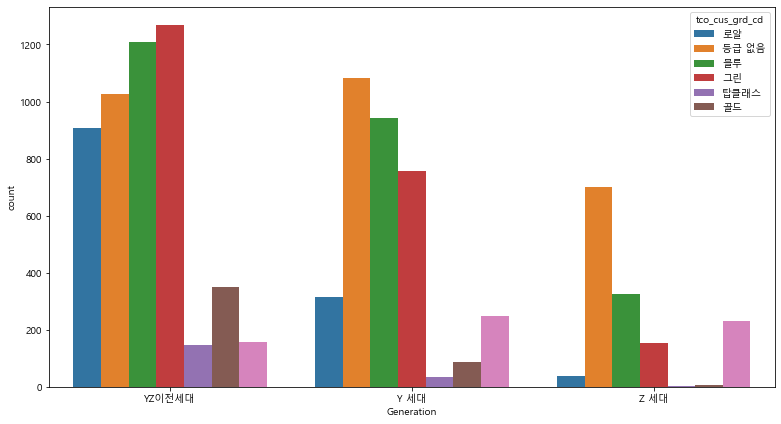

In [28]:
plt.figure(figsize=(13,7))
sns.countplot(x='Generation', hue="tco_cus_grd_cd",data=gen_df)

### 연령별 투자 성향

<AxesSubplot:xlabel='cus_age', ylabel='count'>

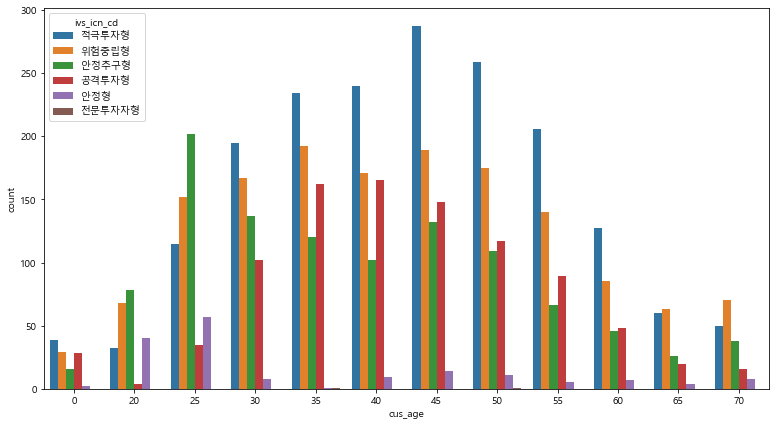

In [29]:
# 해당없음과 정보제공 미동의를 제외한 데이터프레임
cus_df3 = cus_df2[(cus_df2["ivs_icn_cd"]=="적극투자형") | (cus_df2["ivs_icn_cd"]=="위험중립형")
                  | (cus_df2["ivs_icn_cd"]=="안정형") | (cus_df2["ivs_icn_cd"]=="안정추구형")
                  | (cus_df2["ivs_icn_cd"]=="공격투자형") | (cus_df2["ivs_icn_cd"]=="전문투자자형")]

plt.figure(figsize=(13,7))
sns.countplot(x='cus_age', hue="ivs_icn_cd",data=cus_df3)

### 세대별 투자 성향

<AxesSubplot:xlabel='ivs_icn_cd', ylabel='count'>

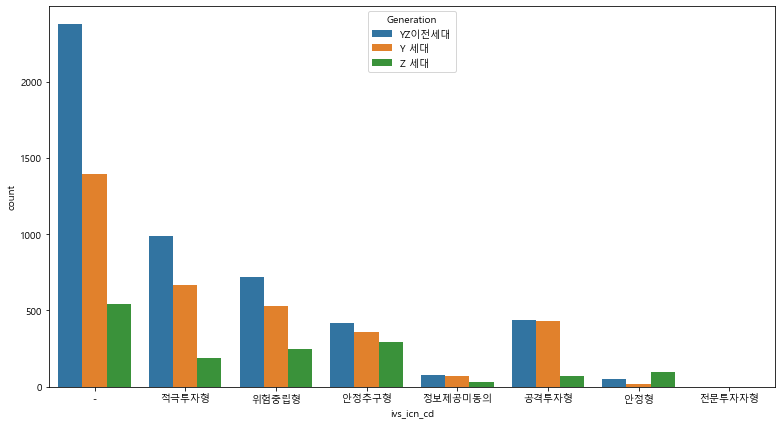

In [30]:
plt.figure(figsize=(13,7))
sns.countplot(x='ivs_icn_cd', hue="Generation",data=gen_df)

> 신세대일수록 안정형과 거리가 멀고 기존세대일 수록 안정적일 거라는 가설과 정반대의 결과가 도출되었습니다. 다른 세대와 달리 Z세대가 비교적 주식시장을 오래 겪지 못하여 안정적인 투자를 하려는 것인지, 기존 세대들은 z세대보다 많은 시드머니로 공격, 적극투자를 성공적으로 했을 시 수익률이 높으므로 저런 성향을 띄는 것인지 고찰해보았습니다.

### 연령별 주문매체

* 데이터프레임 재구성

In [31]:
trdkr_df2 = trdkr_df
trdkr_df2.orr_mdi_dit_cd = trdkr_df2.orr_mdi_dit_cd.replace(1, '영업점단말')
trdkr_df2.orr_mdi_dit_cd = trdkr_df2.orr_mdi_dit_cd.replace(2, '유선단말')
trdkr_df2.orr_mdi_dit_cd = trdkr_df2.orr_mdi_dit_cd.replace(3, '무선단말MTS')
trdkr_df2.orr_mdi_dit_cd = trdkr_df2.orr_mdi_dit_cd.replace(4, 'HTS')

cus_act_df = pd.merge(cus_df, act_df, how='inner', on='cus_id')
act_trdkr_df = pd.merge(trdkr_df2, cus_act_df, how='inner', on='act_id')
act_trdkr_df

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_opn_ym
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,무선단말MTS,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,1,55,11,골드,공격투자형,200512
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,무선단말MTS,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,1,55,11,골드,공격투자형,200512
2,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190312,1,14,14,A215600,1,165.0,75200.0,무선단말MTS,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,1,55,11,골드,공격투자형,200512
3,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190312,2,14,14,A215600,2,72.0,74200.0,무선단말MTS,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,1,55,11,골드,공격투자형,200512
4,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190312,3,14,14,A215600,2,53.0,74600.0,무선단말MTS,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,1,55,11,골드,공격투자형,200512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312659,eb5afea478e1fd7dfa9a14f23234e59ffec0133937833c...,20200316,1,9,9,A005935,2,58.0,43000.0,무선단말MTS,1497ef70cd1785ae7ecc296644f2d2c82addf80af29e91...,1,40,41,등급 없음,-,202003
3312660,bbef227cc889325cf62298f8ef36a079e44bd3972d12df...,20200325,1,9,9,A005935,2,27.0,40950.0,무선단말MTS,b7ea634a638008c43d747ea08999af15cc25572181622a...,2,50,48,등급 없음,-,202003
3312661,73879f24845cac7864f770ade0d349cc511ad605a68154...,20200522,1,15,15,A040910,2,190.0,15550.0,무선단말MTS,533f755649cbdd33860dd98c44cde3f5a9a3a26ac2ef90...,2,35,31,_,안정추구형,202004
3312662,361a367676d1925e4db5c4057c0120362226fea9fabaf6...,20200616,1,15,15,A095570,1,2000.0,3160.0,무선단말MTS,7ec1a46f1a820bfa404bd1dbdbba26b867fd92cdcdce14...,1,40,43,그린,-,201604


* 연령별 사용 주문매체 시각화

<AxesSubplot:xlabel='cus_age', ylabel='count'>

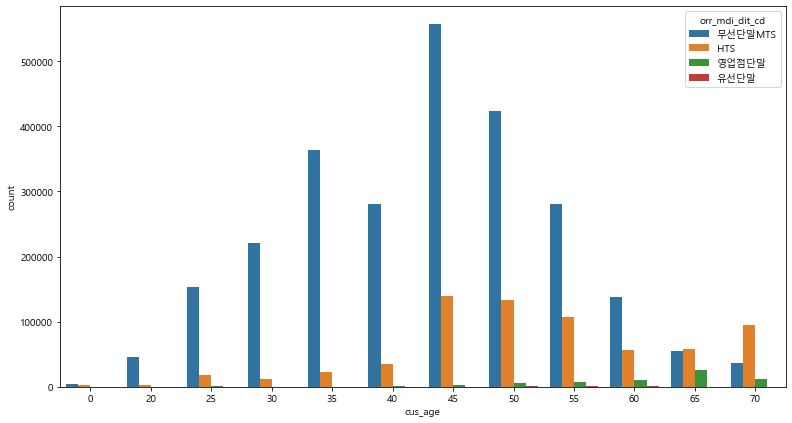

In [32]:
plt.figure(figsize=(13,7))
sns.countplot(x='cus_age', hue="orr_mdi_dit_cd",data=act_trdkr_df)

### 세대별 주문매체

In [33]:
iem_trd = pd.merge(trdkr_df, iem_df, on='iem_cd', how='left')
iem_trd_act = pd.merge(iem_trd, act_df, on='act_id', how='left')
iem_trd_act_cus = pd.merge(iem_trd_act, cus_df, on='cus_id', how='left')

iem_trd_oss = pd.merge(trdoss_df, iem_df, on='iem_cd', how='left')
iem_trd_act_oss = pd.merge(iem_trd_oss, act_df, on='act_id', how='left')
iem_trd_act_cus_oss = pd.merge(iem_trd_act_oss, cus_df, on='cus_id', how='left')

In [34]:
# z세대=2, y세대=1, yz이전세대=0
change_value_dict={0:2,5:2,10:2,15:2,20:2,25:2,30:1,35:1,40:1,45:0,50:0,55:0,60:0,65:0,70:0,}

iem_trd_act_cus=iem_trd_act_cus.replace({'cus_age':change_value_dict})
iem_trd_act_cus_oss=iem_trd_act_cus_oss.replace({'cus_age':change_value_dict})

In [35]:
change_value_dict2={1:'영업점단말', 2:'유선단말', 3:'무선단말MTS', 4:'HTS'}
iem_trd_act_cus_oss=iem_trd_act_cus_oss.replace({'orr_mdi_dit_cd':change_value_dict2})

<AxesSubplot:xlabel='cus_age', ylabel='count'>

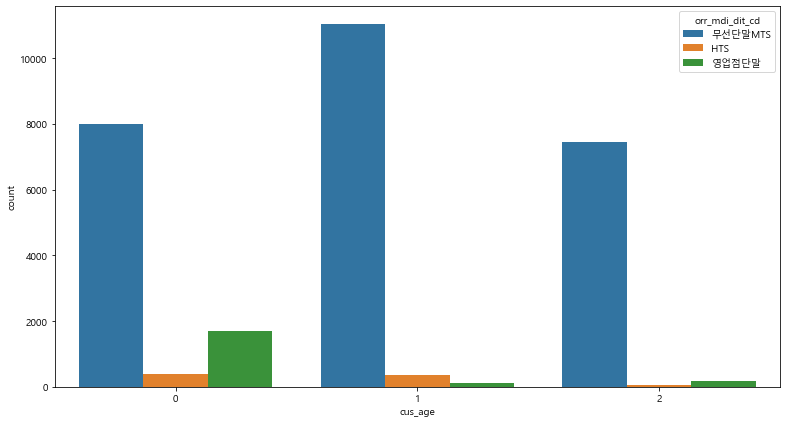

In [36]:
# z세대=2, y세대=1, yz이전세대=0
plt.figure(figsize=(13,7))
sns.countplot(x='cus_age', hue="orr_mdi_dit_cd",data=iem_trd_act_cus_oss)

>X세대에서 HTS가 무선단말보다 높은 비율을 가질 것이라 예상했으나, 모든 세대에서 무선단말이 압도적임을 알 수 있습니다.

### 시도별 투자성향

In [37]:
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('41', '경기')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('11', '서울')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('48', '경남')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('26', '부산')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('27', '대구')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('47', '경북')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('28', '인천')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('44', '충남')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('46', '전남')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('30', '대전')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('29', '광주')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('43', '충북')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('45', '전북')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('42', '강원')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('31', '울산')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('50', '제주')
cus_df3.zip_ctp_cd = cus_df3.zip_ctp_cd.replace('36', '세종')

C:\Anaconda3\envs\myenv\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='zip_ctp_cd', ylabel='count'>

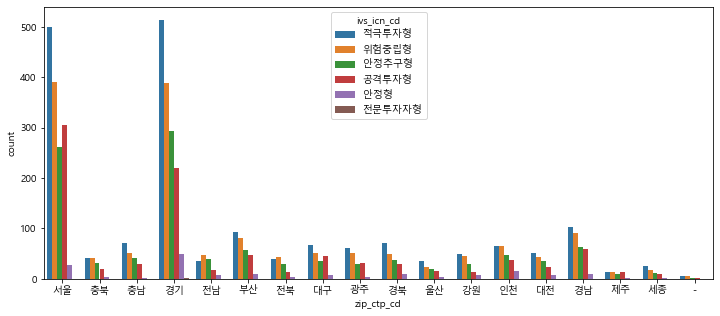

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='zip_ctp_cd', hue="ivs_icn_cd",data=cus_df3)

>시도별 투자성향은 크게 다르지 않았습니다.

### 시도별 고객등급

<AxesSubplot:xlabel='zip_ctp_cd', ylabel='count'>

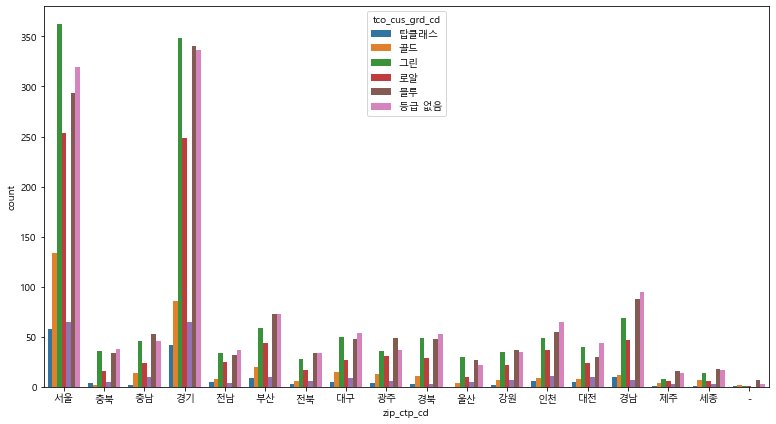

In [39]:
plt.figure(figsize=(13,7))
sns.countplot(x='zip_ctp_cd', hue="tco_cus_grd_cd",data=cus_df3)

### 컬럼별 상관관계 알아보기(연령, 지역, 등급, 투자유형, 통화코드)

In [40]:
itac_Relation = iem_trd_act_cus_oss[['cus_age', 'zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd', 'cur_cd']]
itac_Relation

,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,cur_cd
0,1,28,로얄,공격투자형,CNY
1,1,43,등급 없음,적극투자형,USD
2,1,43,등급 없음,적극투자형,USD
3,1,41,등급 없음,적극투자형,USD
4,2,48,블루,적극투자형,USD
...,...,...,...,...,...
29296,2,41,블루,안정추구형,USD
29297,2,41,블루,안정추구형,USD
29298,2,41,블루,안정추구형,USD
29299,2,41,블루,안정추구형,USD


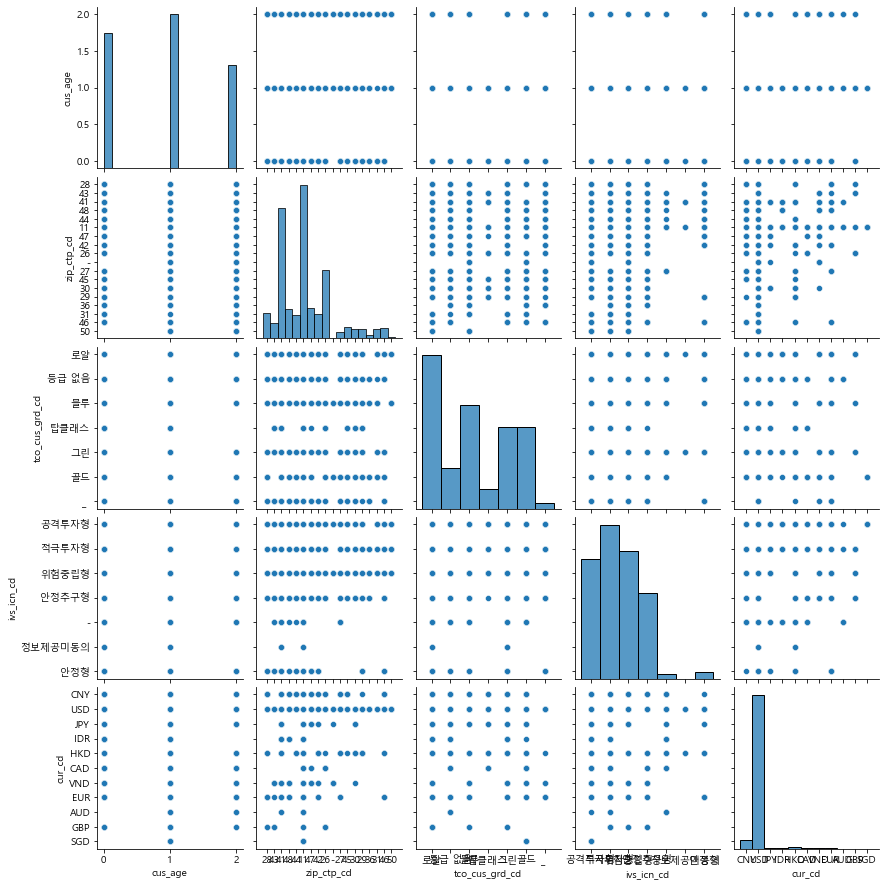

In [41]:
sns.pairplot(data = itac_Relation, vars=['cus_age', 'zip_ctp_cd', 'tco_cus_grd_cd', 'ivs_icn_cd', 'cur_cd'])

### 세대별 거래통화코드 그래프

<AxesSubplot:xlabel='cur_cd', ylabel='count'>

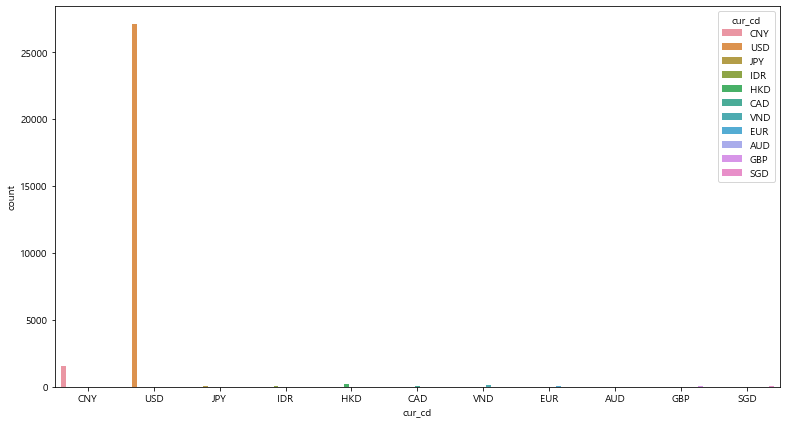

In [43]:
plt.figure(figsize=(13,7))
sns.countplot(x='cur_cd', hue="cur_cd",data=iem_trd_act_cus_oss)

In [42]:
nonUS_x=iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cur_cd']!='USD')&(iem_trd_act_cus_oss['cus_age']==0)]
nonUS_y=iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cur_cd']!='USD')&(iem_trd_act_cus_oss['cus_age']==1)]
nonUS_z=iem_trd_act_cus_oss[(iem_trd_act_cus_oss['cur_cd']!='USD')&(iem_trd_act_cus_oss['cus_age']==2)]

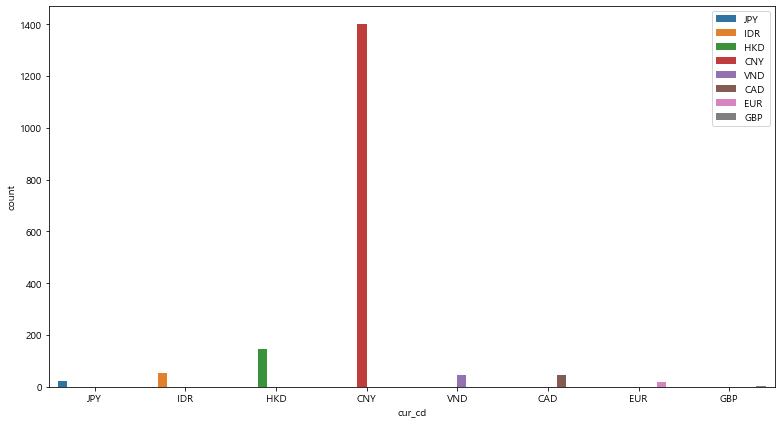

In [44]:
plt.figure(figsize=(13,7))
sns.countplot(x='cur_cd', hue="cur_cd",data=nonUS_x)
plt.legend(loc='upper right')
plt.show()

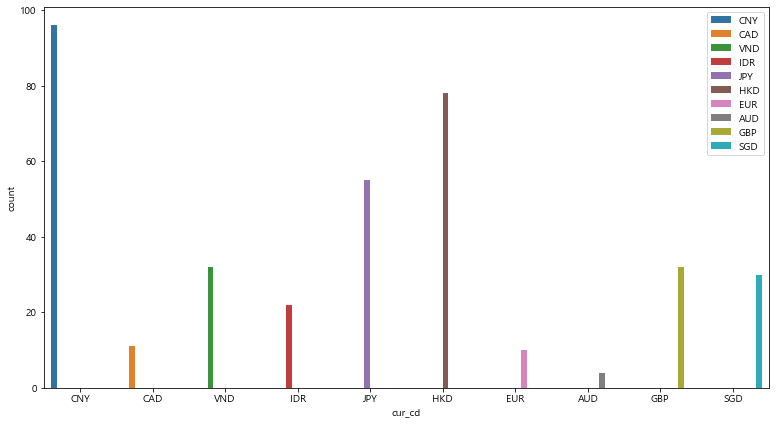

In [45]:
plt.figure(figsize=(13,7))
sns.countplot(x='cur_cd', hue="cur_cd",data=nonUS_y)
plt.legend(loc='upper right')
plt.show()

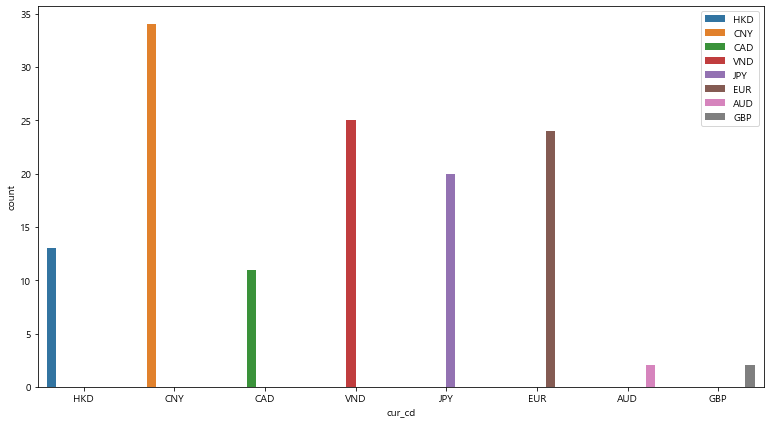

In [46]:
plt.figure(figsize=(13,7))
sns.countplot(x='cur_cd', hue="cur_cd",data=nonUS_z)
plt.legend(loc='upper right')
plt.show()

> 단순 비교시, 달러(미국시장)가 압도적으로 거래량이 많아 이를 제외하고 세대별로 나누어보았습니다.  
처음으로 가설과 일치하는 결과가 도출되었는데, X세대에선 위안 거래만 꽤 이루어졌고 Y,Z세대로 갈 수록 더 많은 통화를 사용해 거래한 것을 알 수 있습니다. 다른 세대와 달리 외국에 대한 정보를 빠르게 습득하며 자라 투자하려는 시장에 대해 넓은 시야를 가진 것이라 유추됩니다.

### 세대별 매도매수 개수 비교

In [47]:
iem_trd_act_cus=iem_trd_act_cus.loc[:,['sby_dit_cd','cus_age']]

<AxesSubplot:xlabel='cus_age', ylabel='count'>

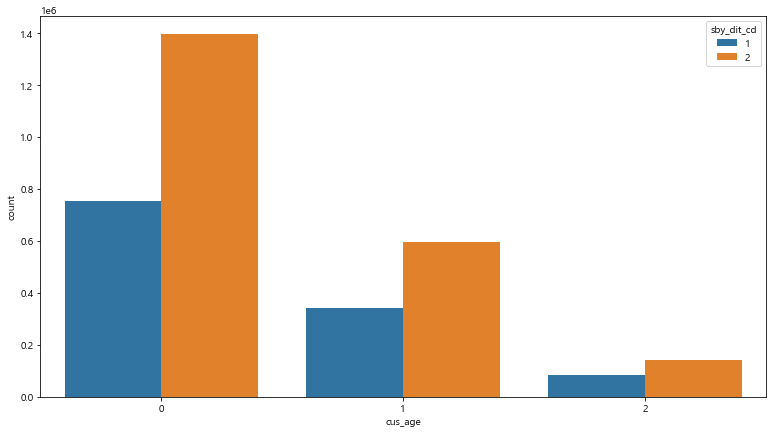

In [48]:
# HUE 매도: 1, 매수: 2
plt.figure(figsize=(13,7))
sns.countplot(x='cus_age', hue="sby_dit_cd",data=iem_trd_act_cus)

>국내 주식장의 경우 일반적으로 단타매매(초단기간에 종목을 매매하는 매매법) 비율이 높아 모든 세대에서 매수, 매도량이 비슷할 것이라 예측했습니다. 허나 이 그래프로만 봤을 땐 매수량이 훨씬 많아 장기투자를 위해 꾸준히 매수하는 투자자가 있는 것이라 생각했으나 단타매매시 고점에서 매수하여 매도하지 못해 매수량이 더 많을 수도 있겠다는 생각을 하였습니다. 이를 결론내려면 관련된 분석이 더 필요할 것 같습니다.

### 바이오 관련 주 매매량 변화 - 삼성전자보통주와 비교  
###### -주가 대폭락으로 저점 형성한 즈음인 2020년 3월 20일 기준으로 분리

* trdkr_df, iem_df 병합

In [49]:
trdkr_df2 = pd.read_csv('2_trd_kr.csv')

trdkr_ieminfo = pd.merge(trdkr_df2, iem_df, how='inner', on='iem_cd')

* 삼성전자보통주 데이터프레임 - it_trdkr

In [50]:
it_trdkr=trdkr_ieminfo[(trdkr_ieminfo['iem_cd'].str.contains('A005930'))]

* 바이오관련주 데이터프레임

In [70]:
iem_trd = pd.merge(trdkr_df, iem_df, on='iem_cd', how='left')
iem_trd_act = pd.merge(iem_trd, act_df, on='act_id', how='left')
iem_trd_act_cus = pd.merge(iem_trd_act, cus_df, on='cus_id', how='left')

bio_iem_trd_act_cus=iem_trd_act_cus[(iem_trd_act_cus['iem_cd'].str.contains('A196170')) | (iem_trd_act_cus['iem_cd'].str.contains('A226330'))
                       | (iem_trd_act_cus['iem_cd'].str.contains('A068270')) | (iem_trd_act_cus['iem_cd'].str.contains('A096530')) 
                          | (iem_trd_act_cus['iem_cd'].str.contains('A215600')) | (iem_trd_act_cus['iem_cd'].str.contains('A019175'))
                         | (iem_trd_act_cus['iem_cd'].str.contains('A207940')) | (iem_trd_act_cus['iem_cd'].str.contains('A052260'))
                         | (iem_trd_act_cus['iem_cd'].str.contains('A068760')) | (iem_trd_act_cus['iem_cd'].str.contains('A091990'))]

In [71]:
bio_iem_trd_act_cus

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,iem_krl_nm,cus_id,act_opn_ym,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3,"SillaJen, Inc. ...",신라젠 ...,8eafaa5dc6eb52ada6b2d93ae1a0544f2c91e71667c945...,200512,1,55,11,02,05
18,e19e29daa0c3bec4f88c015f2b1d4578f46768fa5687fd...,20190102,4,13,13,A068270,2,20.0,214500.0,4,Celltrion ...,셀트리온보통주 ...,4789cb0faddee22fd4fdcd6e262dbc387e4f762f3f5327...,201708,1,70,11,04,04
179,99832c8b75015523b8271819641ca0cb1e76e80b0efcd3...,20190109,1,9,9,A215600,1,60.0,69600.0,3,"SillaJen, Inc. ...",신라젠 ...,cc57d81d8ff19f5ecf79d3d5ab188f780632977df43615...,199812,1,65,11,04,04
181,99832c8b75015523b8271819641ca0cb1e76e80b0efcd3...,20190109,3,10,10,A091990,1,30.0,72000.0,3,"Celltrion Healthcare Co., Ltd. ...",셀트리온헬스케어 ...,cc57d81d8ff19f5ecf79d3d5ab188f780632977df43615...,199812,1,65,11,04,04
182,99832c8b75015523b8271819641ca0cb1e76e80b0efcd3...,20190109,4,10,10,A068760,1,10.0,59900.0,3,Celltrion Pharm Inc. ...,셀트리온제약 ...,cc57d81d8ff19f5ecf79d3d5ab188f780632977df43615...,199812,1,65,11,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312547,71da099d88d3000d83c5ecc4a1e31a6ff780a70d240edf...,20200630,2,9,9,A068270,2,50.0,308500.0,3,Celltrion ...,셀트리온보통주 ...,13fe074bdc3dedd24e3da8f463b14268a3b605cdf2dea3...,201709,1,60,28,01,05
3312548,71da099d88d3000d83c5ecc4a1e31a6ff780a70d240edf...,20200630,3,9,9,A068270,2,50.0,303500.0,3,Celltrion ...,셀트리온보통주 ...,13fe074bdc3dedd24e3da8f463b14268a3b605cdf2dea3...,201709,1,60,28,01,05
3312549,71da099d88d3000d83c5ecc4a1e31a6ff780a70d240edf...,20200630,4,13,15,A068270,2,50.0,306000.0,3,Celltrion ...,셀트리온보통주 ...,13fe074bdc3dedd24e3da8f463b14268a3b605cdf2dea3...,201709,1,60,28,01,05
3312550,71da099d88d3000d83c5ecc4a1e31a6ff780a70d240edf...,20200630,5,15,15,A068270,2,50.0,307500.0,3,Celltrion ...,셀트리온보통주 ...,13fe074bdc3dedd24e3da8f463b14268a3b605cdf2dea3...,201709,1,60,28,01,05


* it_trdkr에서 '2020/03/20 이전=before, 2020/03/20 이후=after' 로 새 컬럼을 추가한 it_trd_orrdt 생성

In [57]:
# 2020/03/20 이전=before, 2020/03/20 이후=after
b_it_trd=it_trdkr[(it_trdkr['orr_dt']<20200320)]
date='before'
b_it_trd['date']=date

a_it_trd=it_trdkr[(it_trdkr['orr_dt']>=20200320)]
date='after'
a_it_trd['date']=date

it_trd_orrdt=pd.concat([b_it_trd,a_it_trd],ignore_index=True)

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


* bio_trdkr에서 '2020/03/20 이전=before, 2020/03/20 이후=after' 로 새 컬럼을 추가한 bio_trd_orrdt 생성

In [53]:
# 2020/03/20 이전=before, 2020/03/20 이후=after
b_trd=bio_trdkr[(bio_trdkr['orr_dt']<20200320)]
date='before'
b_trd['date']=date

a_trd=bio_trdkr[(bio_trdkr['orr_dt']>=20200320)]
date='after'
a_trd['date']=date

bio_trd_orrdt=pd.concat([b_trd,a_trd],ignore_index=True)
bio_trd_orrdt

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,iem_eng_nm,iem_krl_nm,date
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3,"SillaJen, Inc. ...",신라젠 ...,before
1,99832c8b75015523b8271819641ca0cb1e76e80b0efcd3...,20190109,1,9,9,A215600,1,60.0,69600.0,3,"SillaJen, Inc. ...",신라젠 ...,before
2,f6cb82c9546db9be22435f9182dd7832b8d76a5271eded...,20190110,1,8,9,A215600,2,5.0,70500.0,3,"SillaJen, Inc. ...",신라젠 ...,before
3,f6cb82c9546db9be22435f9182dd7832b8d76a5271eded...,20190110,2,11,11,A215600,2,1.0,70800.0,3,"SillaJen, Inc. ...",신라젠 ...,before
4,c43802c61bd7768e656a4bf71336bdab79f56406297ad1...,20190117,1,13,13,A215600,2,26.0,67800.0,3,"SillaJen, Inc. ...",신라젠 ...,before
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104839,80b45c79fd320df00113aad22820bc522bc15e1b1a039e...,20200609,116,14,14,A019175,1,38.0,46750.0,3,ShinpoongPharmaceutical(1P) ...,신풍제약1우선주 ...,after
104840,80b45c79fd320df00113aad22820bc522bc15e1b1a039e...,20200609,117,14,14,A019175,1,31.0,46900.0,3,ShinpoongPharmaceutical(1P) ...,신풍제약1우선주 ...,after
104841,80b45c79fd320df00113aad22820bc522bc15e1b1a039e...,20200609,120,14,14,A019175,2,10.0,46750.0,3,ShinpoongPharmaceutical(1P) ...,신풍제약1우선주 ...,after
104842,80b45c79fd320df00113aad22820bc522bc15e1b1a039e...,20200609,125,14,14,A019175,1,10.0,46950.0,3,ShinpoongPharmaceutical(1P) ...,신풍제약1우선주 ...,after


### 매매량 변화 - 위: 삼성전자보통주, 아래: 바이오관련주(셀트리온 외 9개)

<AxesSubplot:xlabel='date', ylabel='count'>

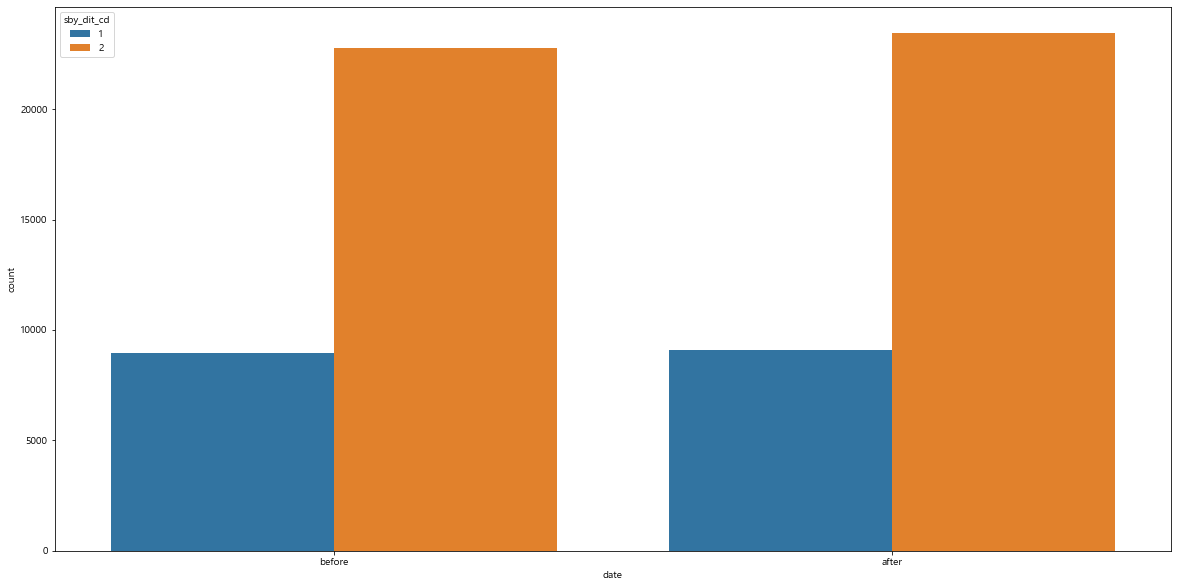

In [54]:
plt.figure(figsize=(20,10))
sns.countplot(x="date", hue="sby_dit_cd",data=it_trd_orrdt)
# x축 before, after - Hue 매도=1, 매수=2

<AxesSubplot:xlabel='date', ylabel='count'>

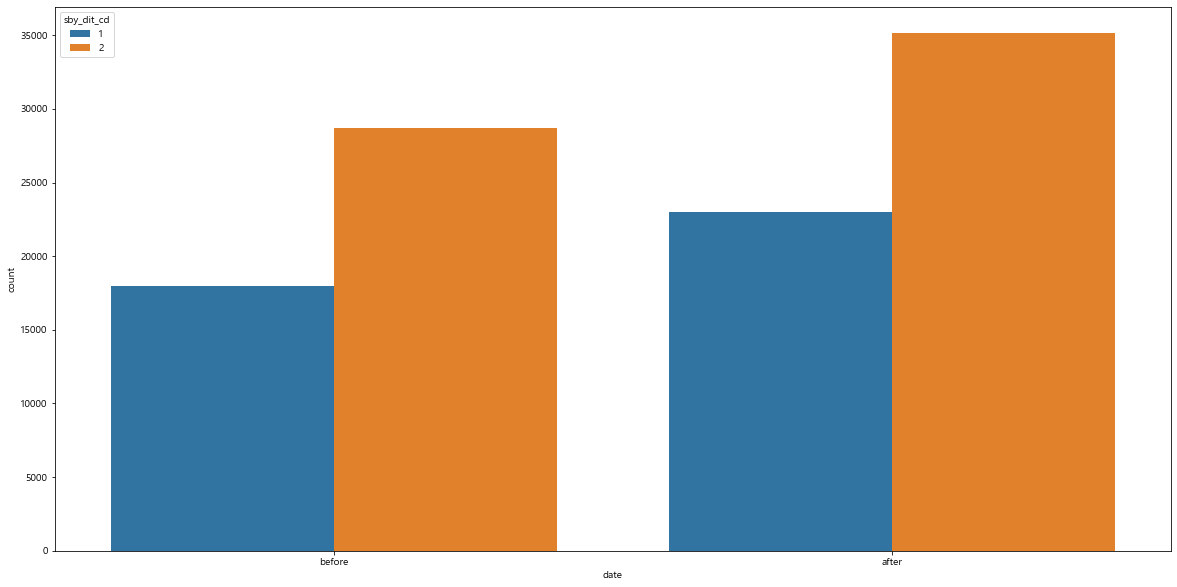

In [55]:
plt.figure(figsize=(20,10))
sns.countplot(x="date", hue="sby_dit_cd",data=bio_trd_orrdt)
# x축 before, after - Hue 매도=1, 매수=2

>코로나 사태 이후 바이오주에 대한 관심이 커졌으리라 생각하여 기점인 2020/03/20 전후로 바이오주 거래량을 비교해보았습니다. 대조군으로 삼성전자를 두고 진행한 결과, 별 차이가 없는 삼성전자에 비해 바이오 우량주 집단은 매수량이 눈에 띄게 증가하였습니다. 

### 세대별 코로나 저점 전후 바이오주 매매 비교

In [118]:
#Z세대 2, Y세대 1, 그 이전 세대 0
bio_iem_trd_act_cus=bio_iem_trd_act_cus.loc[:,['sby_dit_cd','cus_age','orr_dt']]
cus_gen={0:2,5:2,10:2,15:2,20:2,25:2,30:1,35:1,40:1,45:0,50:0,55:0,60:0,65:0,70:0,}
bio_iem_trd_act_cus=bio_iem_trd_act_cus.replace({'cus_age': cus_gen})

In [92]:
bio_iem_trd_act_cus_b=bio_iem_trd_act_cus

bio_iem_trd_act_cus=bio_iem_trd_act_cus[(bio_iem_trd_act_cus['orr_dt']>20200320)]
date='after'
bio_iem_trd_act_cus['date']=date

bio_iem_trd_act_cus_b=bio_iem_trd_act_cus_b[(bio_iem_trd_act_cus_b['orr_dt']<=20200320)]
date='before'
bio_iem_trd_act_cus_b['date']=date

C:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [112]:
bio_gen=pd.concat([bio_iem_trd_act_cus,bio_iem_trd_act_cus_b],ignore_index=True)
bio_gen.drop('orr_dt',axis=1)

,sby_dit_cd,cus_age,date
0,2,0,after
1,1,0,after
2,1,0,after
3,1,0,after
4,1,0,after
...,...,...,...
104839,1,1,before
104840,2,1,before
104841,1,0,before
104842,2,0,before


<AxesSubplot:xlabel='date', ylabel='count'>

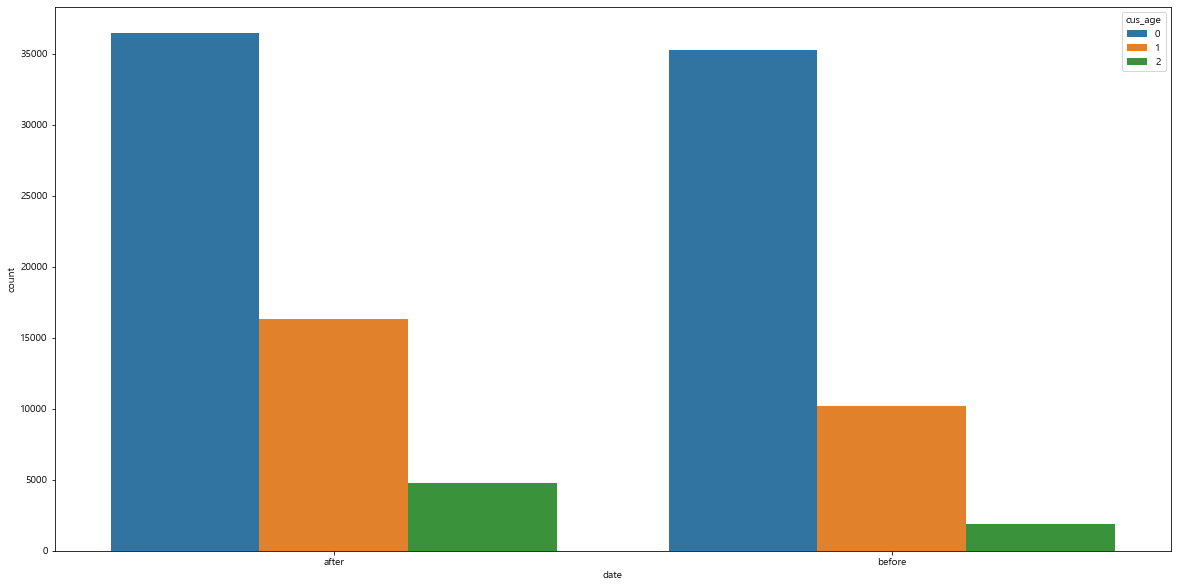

In [113]:
plt.figure(figsize=(20,10))
sns.countplot(x="date", hue="cus_age",data=bio_gen)

>모든 세대에서 매매량이 증가했으나, YZ세대의 비율이 눈에 띄게 상승한 것을 볼 수 있습니다.

In [124]:
submission_path = os.path.dirname(os.path.abspath('__file__'))
submission_path = os.path.join(submission_path, 'submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,time,team,join
0,1,1,1


In [127]:
import pandas as pd
data = pd.read_csv('submission.csv', engine='python')
data.to_csv('submission3.csv', index=False)

#### 소감
데이터 분석에 대해 더 이해하며, 주식에 대한 흥미로운 결과를 많이 도출할 수 있어서 유익한 시간이었습니다. 급하게 준비한지라 생각했던 아이디어를 모두 구현하지 못했다는 아쉬움이 남지만, 이 경험을 계기로 주식과 관련한 여러 데이터셋을 찾아 제대로 모두 구현해보고 더 많은 분석을 해보겠다는 의욕을 다지게 되었습니다.